
## Exercice 1: CENTRAL LIMIT THEOREM

### Pol Adillon Albero
14/12/2021

**Objetive:** Consider the problem of throwing dice multiple times and calculate the resulting distribution.

### 1.1 Figure 1

A die, thrown once, generates an integer number in the range from 1 to 6.

Calculate the mean value $\mu$,

$$ \mu = <x> = \frac{1}{6}\sum^6_{i=1} x_i$$

with $x_i = i$ and the variance $\sigma$

$$\sigma ^2 = <x^2>-<x>^2$$

where 
$$ <x^2> = \frac{1}{6}\sum^6_{i=1} x_i^2$$

In [605]:
import random
import matplotlib.pyplot as plt
import numpy as np


#Mean Value calcultation:
mu_= 0  # mean value but not normalized
mu2_ = 0 # <x²> but not normalized
for i in range(1,7):
    mu_ = mu_ + i
    mu2_ = mu2_ + i**2
    
    
mu = mu_/6
mu2 = mu2_/6

variance2 = mu2-mu**2
variance = np.sqrt(variance2)

print("Mean Value: μ =",mu)
print("Variance: σ =", variance)


Mean Value: μ = 3.5
Variance: σ = 1.707825127659933


Use a random number generator to simulate dice throwing and calculate the resulting probability distribution $p_i$ of obtaining each numbers $i$ from 1 to 6. Use discrete normalization

$$ \sum_i p_i = 1 $$

In [606]:
N_dice = 1              #Number of dice used

print("Random output of thowing a die:", random.randint(1,6))

Possible_Outcome = [0]*(5*N_dice+1)  #It contains all the possible outputs
                                     #of throwing N dice, summing the outputs,
                                     #and deviding the sum by N_dice.
Outcome_Counter = [0]*(5*N_dice+1)   #We will count how many times we get each number

for i in range(5*N_dice+1):
    Possible_Outcome[i] = 1 +(1/N_dice)*i
    
print("These are the possible outoputs:")
print("Possible_Outcome", Possible_Outcome)
    
print("Here we have how many times we have get each number:")
print("Outcome_Counter:", Outcome_Counter)

#Just to check (JTC): Both lists must have the same length.
print(len(Possible_Outcome)==len(Outcome_Counter))


Random output of thowing a die: 4
These are the possible outoputs:
Possible_Outcome [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Here we have how many times we have get each number:
Outcome_Counter: [0, 0, 0, 0, 0, 0]
True


In [607]:
N_throws = 10000                       #Number of throws
Outcome_Counter = [0]*(5*N_dice+1)     #Inizialize the list to 0

#Thowing the die N_throws and counting the different outputs
#This ONLY for 1 DIE!
for _ in range(N_throws):
    i=random.randint(1,6)
    Outcome_Counter[i-1] = Outcome_Counter[i-1]+1
    
print("Afer ",N_throws,"our list is")
print(Outcome_Counter)

#JTC: sum(Outcome_Counter)==N_throws
print("The total number of throws is:", sum(Outcome_Counter))

Afer  10000 our list is
[1682, 1626, 1641, 1693, 1671, 1687]
The total number of throws is: 10000


Plot the resulting probability distribution function $p_i$ and compare it with uniform distribution prediction.

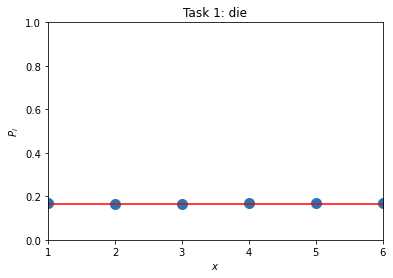

Check if the probabilities are normalized. Σp_i=  1.0


In [608]:
plt.xlim([1,6])
plt.ylim([0,1])
plt.xlabel("$x$")
plt.ylabel("$P_i$")
plt.title("Task 1: die")

#Outcome_Counter has been normalized (N_throws)
plt.scatter(Possible_Outcome,np.divide(Outcome_Counter,N_throws), s=100)
plt.axhline(y = 1/6, color = "r", linestyle = "-")
plt.show()

#Σpi = 1
print("Check if the probabilities are normalized. Σp_i= ",sum(np.divide(Outcome_Counter,N_throws)))

### 1.2 Figure 2

Assume that one random even consists in throwing a die twice and calculating the average value,

$$ x = \dfrac{rand(6)+rand(6)}{2} $$
    
Calculate the probability distribution of the outcome and show it on the figure.

In [609]:
N_throws = 10000       #Number of throws
N_dice = 2             #Number of dice

Possible_Outcome = [0]*(5*N_dice+1)  #It contains all the possible outputs
                                     #of throwing N dice, summing the outputs,
                                     #and deviding the sum by N_dice.
Outcome_Counter = [0]*(5*N_dice+1)   #We will count how many times we get each number

for i in range(5*N_dice+1):          #The step between different possible Outcomes is 1/N_dice
    Possible_Outcome[i] = 1 +(1/N_dice)*i
    
#print("These are the possible outoputs:")
#print("Possible_Outcome", Possible_Outcome)
#print("Here we have how many times we have get each number:")
#print("Outcome_Counter:", Outcome_Counter)


for _ in range(N_throws):
    suma = 0                   #He we'll add the sum of all dice
    for l in range(N_dice):
        i=random.randint(1,6)
        suma = suma + i
    
    x = suma/N_dice           #Average all dice
    
    #Actualize Outcome_Counter list. 
    Outcome_Counter[int((x-1)*N_dice)] = Outcome_Counter[int((x-1)*N_dice)]+1
    #With int() we have some problems for numbers as 9.999999998
    #Outcome_Counter[int((x-1)*N_dice)] = Outcome_Counter[int((x-1)*N_dice)]+1
    
    
print("Afer ",N_throws,"our list is")
print(Outcome_Counter)

total = sum(Outcome_Counter)

#JTC: sum(Outcome_Counter)==N_throws
print("The total number of throws is:", sum(Outcome_Counter))

Afer  10000 our list is
[292, 544, 882, 1082, 1378, 1669, 1394, 1063, 840, 570, 286]
The total number of throws is: 10000


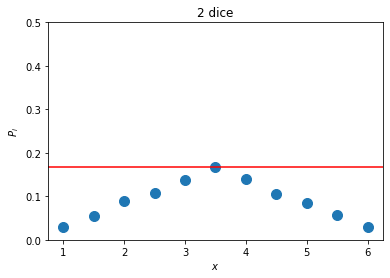

Check if the probabilities are normalized. Σp_i=  1.0


In [610]:
plt.ylim([0,0.5])
plt.xlabel("$x$")
plt.ylabel("$P_i$")
title = "%s dice" % (N_dice)
plt.title(title)

#plt.title("dice")

#Outcome_Counter has been normalized (N_throws)
#(???)
#And multipied by N_dice (???) Not sure why I have to do this or if I have (???)
plt.scatter(Possible_Outcome,np.divide(Outcome_Counter,N_throws), s=100)


plt.axhline(y = 1/6, color = "r", linestyle = "-")
plt.show()


#Σpi = 1
print("Check if the probabilities are normalized. Σp_i= ",sum(np.divide(Outcome_Counter,N_throws)))

### 1.3 Figure 3

Consider the case when one random even consists in throwing a die $N$ times and calculating the average value

$$ x = \dfrac{\sum_i^N rand(6)}{N} $$
    
Calculate the probability distribution $p(x)$ and assume that for large $N$, the spacing $dx$ between two allowed subsequent values of $x$ is small and that random value $x$ can be considered as a continuous variable. Use continuous variable convertion to normalize the PDF, 

$$\int p(x)dx = 1 $$

Compare the obtained result with the prediction of the Central Limit Theorem:

$$ g(x) = \frac{1}{\sqrt{2\pi}\sigma '} \exp \left(- \frac{(x-\mu)^2}{2 \sigma ' ^2} \right)$$

where the reduced variance is given by $\sigma ' = \frac{\sigma }{\sqrt{N}}$

Find a large enough value of $N$ so that the CLT applies and show ther resulting.

In [611]:
N_throws = 10000     #Number of throws
N_dice = 10          #Number of dice

Possible_Outcome = [0]*(5*N_dice+1)  #It contains all the possible outputs
                                     #of throwing N dice, summing the outputs,
                                     #and deviding the sum by N_dice.
Outcome_Counter = [0]*(5*N_dice+1)   #We will count how many times we get each number

for i in range(5*N_dice+1):          #The step between different possible Outcomes is 1/N_dice
    Possible_Outcome[i] = 1 +(1/N_dice)*i
    
#print("These are the possible outoputs:")
#print("Possible_Outcome", Possible_Outcome)
#print("Here we have how many times we have get each number:")
#print("Outcome_Counter:", Outcome_Counter)


for _ in range(N_throws):
    suma = 0                   #He we'll add the sum of all dice
    for l in range(N_dice):
        i=random.randint(1,6)
        suma = suma + i
          
    x = suma/N_dice            #Average all dice
    
    #print((x-1.00)*N_dice)
    #if (x>2.4 and x<2.5):
        #print(x)
        #print(round((x-1.00)*N_dice))
     
    #Actualize Outcome_Counter list. 
    Outcome_Counter[round((x-1.00)*N_dice)] = Outcome_Counter[round((x-1)*N_dice)]+1
    
    
print("Afer ",N_throws,"our list is")

### JTC ###
#for i in range(len(Possible_Outcome)):
#    print("%0.2f" %Possible_Outcome[i],Outcome_Counter[i], "\n")
    
    
#print(Possible_Outcome,Outcome_Counter)

total = sum(Outcome_Counter)

#JTC: sum(Outcome_Counter)==N_throws
print("The total number of throws is:", sum(Outcome_Counter))

Afer  10000 our list is
The total number of throws is: 10000


Check if the probabilities are normalized. Σp_i=  0.9999999999999999
Check if the probabilities are normalized. ∫p_i dx=  0.09999999999999999
Δx:  0.1


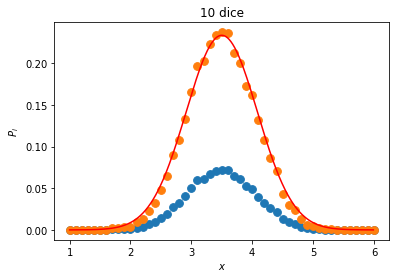

In [645]:
ax = plt.gca()
ax.autoscale_view()
ax.relim()

#plt.ylim([0,0.5])
plt.xlabel("$x$")
plt.ylabel("$P_i$")
title = "%s dice" % (N_dice)
plt.title(title)

plt.scatter(Possible_Outcome,np.divide(Outcome_Counter,N_throws), s=60)


# Gaussian:
t = np.arange(1., 6., 0.01)
gaussian = 1/(np.sqrt(2*np.pi)*variance)*np.exp(-np.square(t-mu)/2*variance**2)

plt.plot(t, gaussian, 'r')

#Normalization:
plt.scatter(Possible_Outcome,np.divide(Outcome_Counter,N_throws/3.3), s=60)


plt.draw()


#Σpi = 1 (Discontinous)
print("Check if the probabilities are normalized. Σp_i= ",sum(np.divide(Outcome_Counter,N_throws)))

#∫pi = 1 (Continous)
print("Check if the probabilities are normalized. ∫p_i dx= ",sum(np.divide(Outcome_Counter,N_throws))*(1/N_dice))

print("Δx: ",1/N_dice)







Red line: $ g(x) = \frac{1}{\sqrt{2\pi}\sigma '} \exp \left(- \frac{(x-\mu)^2}{2 \sigma ' ^2} \right)$

Blue dots: $\sum p_i = 1$

Orange dots: $\int p_i dx = 1$



In [613]:

plt.show()



### 1.4 Error estimation

Assume that multiple dice throwing is used to estimate the mean value $\mu$. Estimate $\mu$ by throwing $N =10$ and $N = 100$ dice. Estimate the statistical error by $\sigma$. Report the obtained numbers.

In [481]:
#Multiple dice throwing
N_dice = 10
adder = 0
for _ in range(N_dice):
    i=random.randint(1,6)
    adder = adder + i

mean_value_data = adder/N_dice

print("Num. dice:",N_dice)
print("mean_value_data: μ* =",mean_value_data)
print("Mean Value: μ =",mu)
print("Variance: σ =", variance)
print("Error: μ*-μ =",mean_value_data-mu)
print("Statistical error: σ/sqrt(N)=",variance/(N_dice)**(1/2))

#Error is of the order the statistical error
#If we take 3σ/sqrt(N) the error is 'always' smaller than the statistical
print(3*variance/(N_dice)**(1/2)>abs(mean_value_data-mu))
print()

N_dice = 100
adder = 0
for _ in range(N_dice):
    i=random.randint(1,6)
    adder = adder + i

mean_value_data = adder/N_dice

print("Num. dice:",N_dice)
print("mean_value_data: μ* =",mean_value_data)
print("Mean Value: μ =",mu)
print("Variance: σ =", variance)
print("Error: μ*-μ =",mean_value_data-mu)
print("Statistical error: σ/sqrt(N)=",variance/(N_dice)**(1/2))

#Error is of the order the statistical error
#If we take 3σ/sqrt(N) the error is 'always' smaller than the statistical
print(3*variance/(N_dice)**(1/2)>abs(mean_value_data-mu))
print()

print("Error is of the order the statistical error.")
print("Error gets smaller when N increases")



Num. dice: 10
mean_value_data: μ* = 3.7
Mean Value: μ = 3.5
Variance: σ = 1.707825127659933
Error: μ*-μ = 0.20000000000000018
Statistical error: σ/sqrt(N)= 0.5400617248673216
True

Num. dice: 100
mean_value_data: μ* = 3.21
Mean Value: μ = 3.5
Variance: σ = 1.707825127659933
Error: μ*-μ = -0.29000000000000004
Statistical error: σ/sqrt(N)= 0.1707825127659933
True

Error is of the order the statistical error.
Error gets smaller when N increases
